In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats as st
import seaborn as sb
sb.set()

import import_ipynb
import popularity_metadata_options

importing Jupyter notebook from popularity_metadata_options.ipynb


### For main dataset 

In [2]:
df = pd.read_csv('./data/popularity/mean_merge.csv')
df = df.dropna()

In [3]:
df.head(2)

,Unnamed: 0,full_text_x,Emotional_disclosure,Information_disclosure,score_x,emo_disc.1,emo_disc.2,emo_disc.3,emo_disc.4,info_disc.1,...,WorkTime.2_y,WorkTime.3_y,WorkTime.4_y,popularity_y,num_words,num_chars,emo_disc_pc_agree,info_disc_pc_agree,emo_supp_pc_agree,info_supp_pc_agree
0,0,'' Alot of people DONT think like that when t...,0,0,2,True,True,True,False,False,...,11,7,19,0,12,57,0.75,0.50,1.0,0.75
1,1,'Official' would be one way to describe it.,1,0,2,False,False,False,True,True,...,43,11,41,0,8,43,0.75,0.75,1.0,1.00


TP1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
WT1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC1: weighted by 1 average per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL1: weighted by 1 normalised number of characters per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP1: weighted by average of TP1 and TP2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


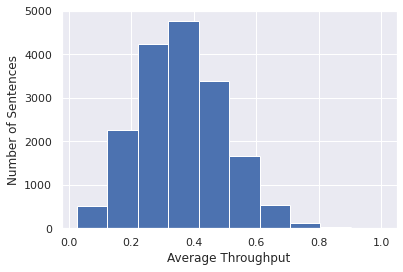

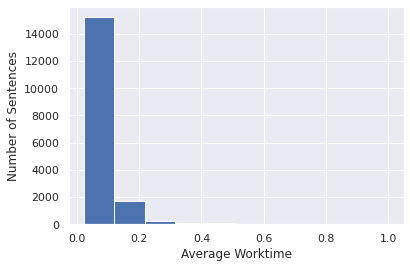

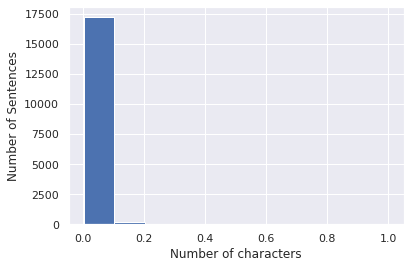

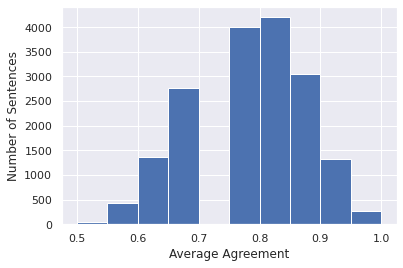

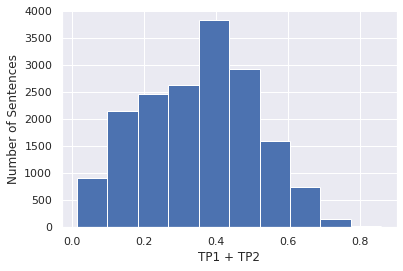

In [4]:
throughput_option = 'TP1'
worktime_option = 'WT1'
pc_agreement_option = 'PC1'
textlength_option = 'TL1'
special_option = 'SP1'
k_option_for_tp = 1
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_avg, df_worktime_avg, df_agreement_avg, df_textlength_avg, df_special_1 = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_avg['avg_throughput'].hist()
plt.xlabel('Average Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_throughput_avg.png')

plt.figure()
hist = df_worktime_avg['avg_worktime'].hist()
plt.xlabel('Average Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_worktime_avg.png')

plt.figure()
hist = df_textlength_avg['num_chars'].hist()
plt.xlabel('Number of characters')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_textlength_numchars.png')

plt.figure()
hist = df_agreement_avg['avg_agreement'].hist()
plt.xlabel('Average Agreement')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_agreement_avg.png')

plt.figure()
hist = df_special_1['average_avg_var'].hist()
plt.xlabel('TP1 + TP2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_1.png')

In [5]:
df_throughput_avg.head(2)

,Throughput.1_x,Throughput.2_x,Throughput.3_x,Throughput.4_x,Throughput.1_y,Throughput.2_y,Throughput.3_y,Throughput.4_y,avg_throughput
0,512,845,40,305,1130,650,561,92,0.180284
1,2,196,15,2261,1072,215,1950,3272,0.391655


TP2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP2: weighted by average of WT1 and WT2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


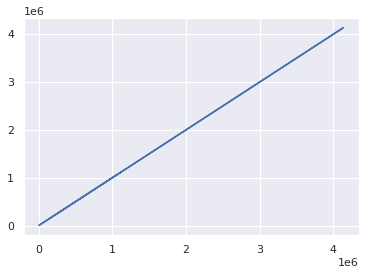

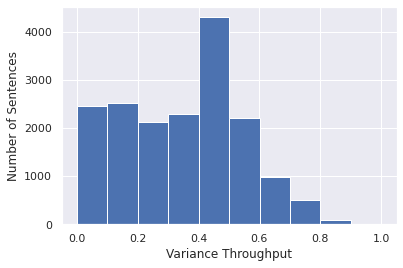

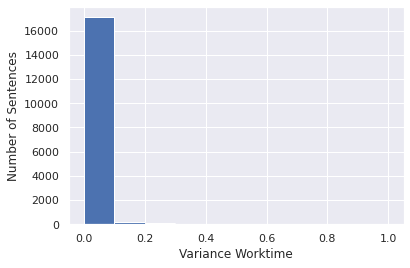

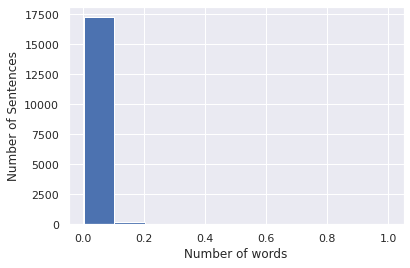

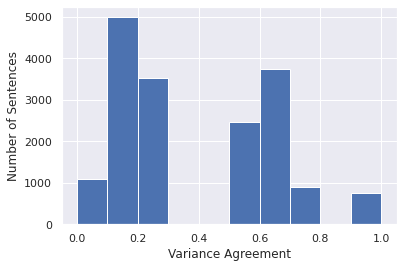

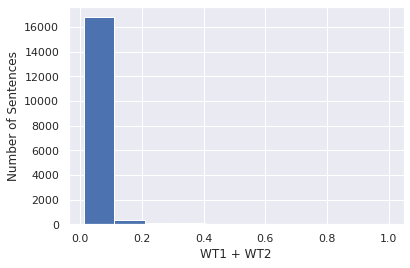

In [6]:
throughput_option = 'TP2'
worktime_option = 'WT2'
pc_agreement_option = 'PC2'
textlength_option = 'TL2'
special_option = 'SP2'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, textlength_option, special_option, k_option_for_tp]

df_throughput_var, df_worktime_var, df_agreement_var, df_textlength_var, df_special_var = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_var['var_throughput'].hist()
plt.xlabel('Variance Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_throughput_var.png')

plt.figure()
hist = df_worktime_var['var_worktime'].hist()
plt.xlabel('Variance Worktime')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_worktime_var.png')

plt.figure()
hist = df_textlength_var['num_words'].hist()
plt.xlabel('Number of words')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_textlength_words.png')

plt.figure()
hist = df_agreement_var['var_agreement'].hist()
plt.xlabel('Variance Agreement')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_agreement_var.png')

plt.figure()
hist = df_special_var['average_avg_var'].hist()
plt.xlabel('WT1 + WT2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_2.png')

TP3 + k: weighted by 1 inverted k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
SP2: weighted by average of WT1 and WT2 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


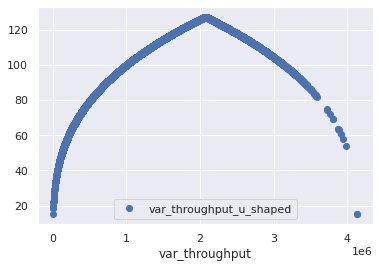

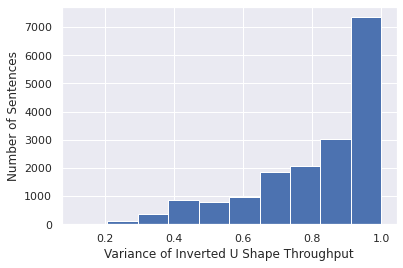

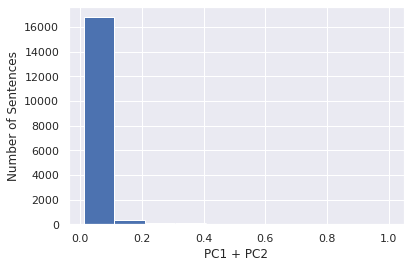

In [7]:
throughput_option = 'TP3'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'SP2'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_inv_u, _, _, _, df_special_4 = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_inv_u['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Inverted U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_throughput_u_var.png')

plt.figure()
hist = df_special_4['average_avg_var'].hist()
plt.xlabel('PC1 + PC2')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_3.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
# RAND_NORM: weighted by 1 normally distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


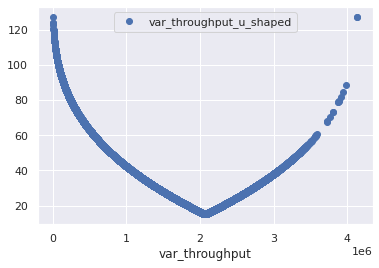

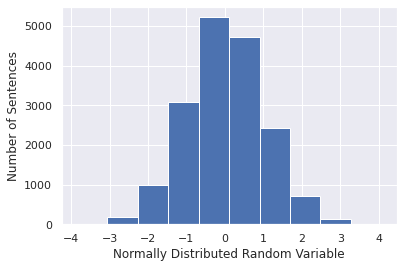

In [8]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_NORM'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

_, _, _, _, df_special_norm = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_special_norm['special_norm'].hist()
plt.xlabel('Normally Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_special_5.png')

TP4 + k: weighted by 1 upright k-power U-shaped variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
Plot below: old throughput (x-axis) vs new throughput (y-axis)
WT2: weighted by 1 linear variance per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
PC3: weighted by 1 PC agreement weight per annotation in each OHE, i.e. (a, b, c, d) -> (w1*a, w2*b, w3*c, w4*d)
TL2: weighted by 1 normalised number of words per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)
RAND_UNI: weighted by 1 uniformly distributed random number between 0 to 1 per set of OHE, i.e. (a, b, c, d) -> (w*a, w*b, w*c, w*d)


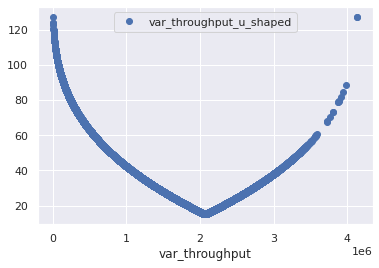

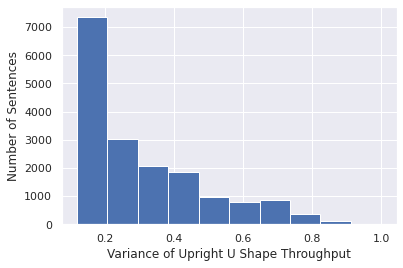

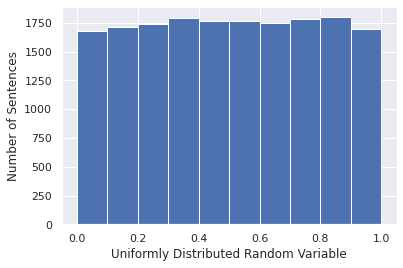

In [9]:
throughput_option = 'TP4'
worktime_option = 'WT2'
pc_agreement_option = 'PC3'
textlength_option = 'TL2'
special_option = 'RAND_UNI'
k_option_for_tp = 3
metadata_options_choices = [throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp]

df_throughput_upright_u, _, _, _, df_special_uni = popularity_metadata_options.set_OHE_pipeline_options(df, throughput_option, worktime_option, pc_agreement_option, textlength_option, special_option, k_option_for_tp)

plt.figure()
hist = df_throughput_upright_u['var_throughput_u_shaped'].hist()
plt.xlabel('Variance of Upright U Shape Throughput')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_throughput_u_var.png')

plt.figure()
hist = df_special_uni['special_uni'].hist()
plt.xlabel('Uniformly Distributed Random Variable')
plt.ylabel('Number of Sentences')
plt.savefig('./output/main_special_4.png')

### Correlation Plots

In [10]:
df_merge = pd.merge(df, df_throughput_avg['avg_throughput'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_worktime_avg['avg_worktime'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_textlength_avg['num_chars'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_1['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_agreement_avg['avg_agreement'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_worktime_var['var_worktime'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_textlength_var['num_words'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_agreement_var['var_agreement'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_var['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_throughput_inv_u['var_throughput_u_shaped'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_4['average_avg_var'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_throughput_upright_u['var_throughput_u_shaped'], left_index=True, right_index=True)
df_merge = pd.merge(df_merge, df_special_uni['special_uni'], left_index=True, right_index=True)

In [11]:
df_merge.head()

,Unnamed: 0,full_text_x,Emotional_disclosure,Information_disclosure,score_x,emo_disc.1,emo_disc.2,emo_disc.3,emo_disc.4,info_disc.1,...,average_avg_var_x,avg_agreement,var_worktime,num_words_y,var_agreement,average_avg_var_y,var_throughput_u_shaped_x,average_avg_var,var_throughput_u_shaped_y,special_uni
0,0,'' Alot of people DONT think like that when t...,0,0,2,True,True,True,False,False,...,0.108786,0.7500,0.000220,0.024948,0.5000,0.018882,0.404177,0.018882,0.713436,0.902971
1,1,'Official' would be one way to describe it.,1,0,2,False,False,False,True,True,...,0.381548,0.8750,0.002708,0.016632,0.2500,0.059644,0.905971,0.059644,0.211643,0.896339
2,2,"""...you mix me a cocktail.""",0,0,2,True,True,True,False,False,...,0.560586,0.7500,0.375058,0.010395,0.5000,0.426579,0.942452,0.426579,0.175161,0.844963
3,3,"""Be kind, for everyone you meet is fighting a ...",0,0,3,True,True,True,False,True,...,0.361700,0.9375,0.001063,0.029106,0.1875,0.037390,0.780537,0.037390,0.337076,0.161614
4,4,"""Consider yourself lucky because I chose you""?",0,0,1,True,True,True,True,True,...,0.392237,1.0000,0.001169,0.014553,0.0000,0.043302,0.950100,0.043302,0.167513,0.931463


In [12]:
df_combined = pd.concat([df_throughput_avg['avg_throughput'], df_worktime_avg['avg_worktime'], df_textlength_avg['num_chars'], df_agreement_avg['avg_agreement'], df_special_1['average_avg_var'], df_throughput_var['var_throughput'], df_worktime_var['var_worktime'], df_textlength_var['num_words'], df_agreement_var['var_agreement'], df_special_var['average_avg_var'], df_throughput_inv_u['var_throughput_u_shaped'], df_special_4['average_avg_var'], df_special_norm['special_norm'], df_throughput_upright_u['var_throughput_u_shaped'], df_special_uni['special_uni']],axis=1)

In [13]:
df_merge.to_csv('./output/pop_metadata_features.csv', index=False)

In [14]:
corr_matrix = df_combined.corr()
corr_matrix.to_csv('./output/pop_correlation_matrix.csv', index=True)

<AxesSubplot:>

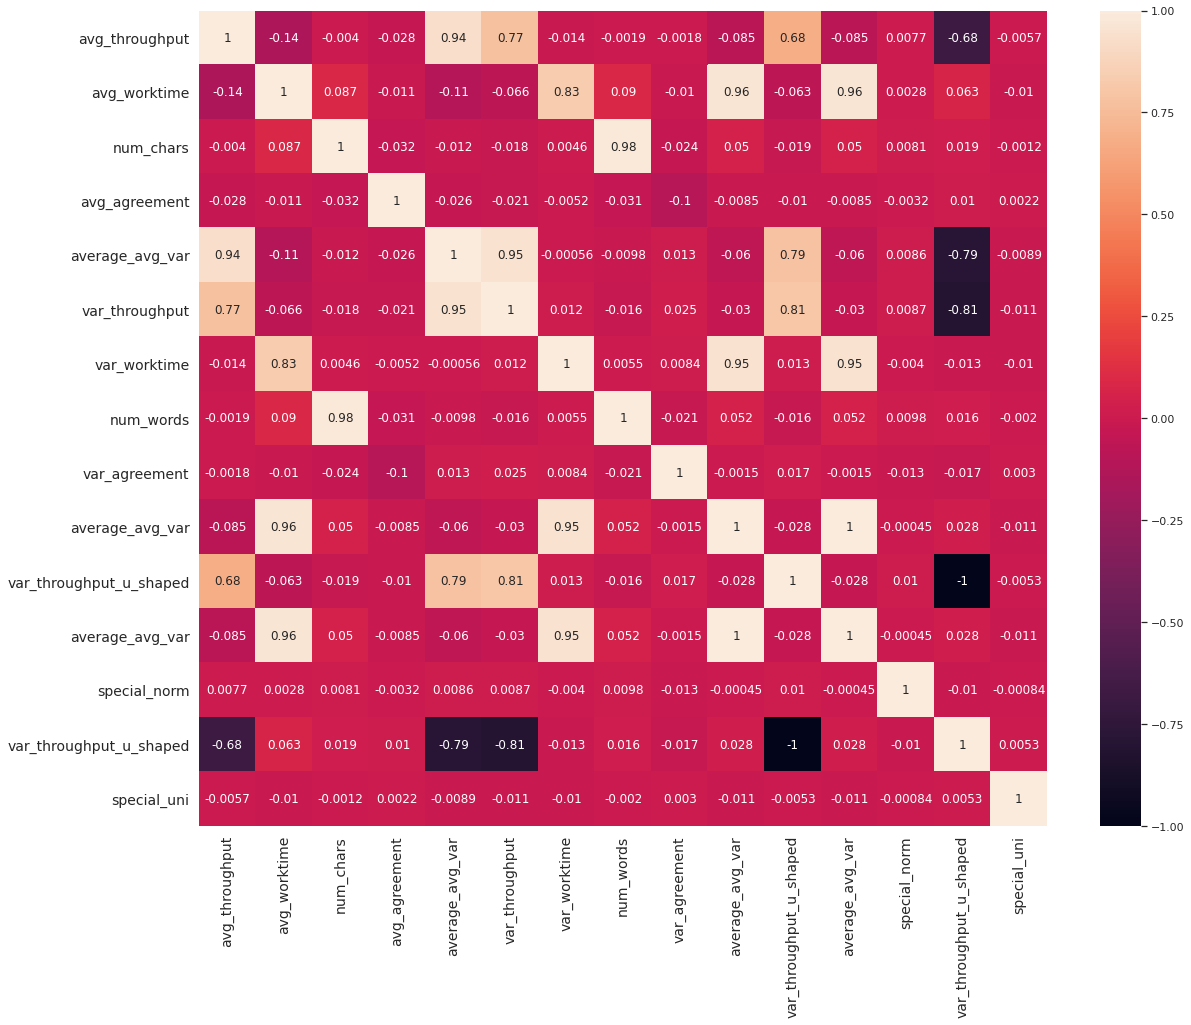

In [15]:
f = plt.figure(figsize=(19, 15))
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
sb.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)

#### Plot Throughput

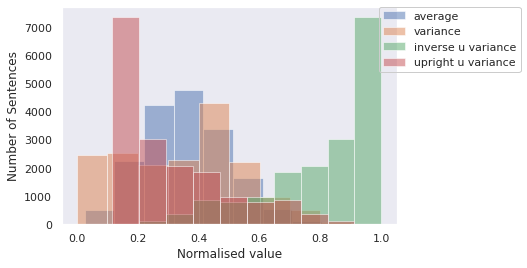

In [16]:
plt.figure()
df_throughput_avg['avg_throughput'].plot(kind='hist', alpha=0.5, label='average')
df_throughput_var['var_throughput'].plot(kind='hist', alpha=0.5, label='variance')
df_throughput_inv_u['var_throughput_u_shaped'].plot(kind='hist', alpha=0.5, label='inverse u variance')
df_throughput_upright_u['var_throughput_u_shaped'].plot(kind='hist', alpha=0.5, label='upright u variance')
plt.grid(b=None)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.2,0.90), bbox_transform=plt.gcf().transFigure)
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_overlay_throughput.png', transparent=True, bbox_inches='tight')

#### Plot Worktime

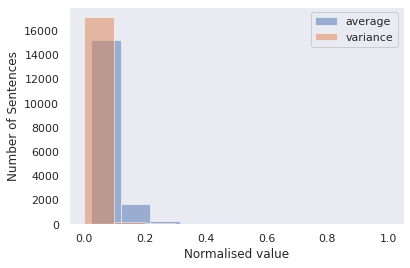

In [17]:
plt.figure()
df_worktime_avg['avg_worktime'].plot(kind='hist', alpha=0.5, label='average')
df_worktime_var['var_worktime'].plot(kind='hist', alpha=0.5, label='variance')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_overlay_worktime.png', transparent=True, bbox_inches='tight')

#### Plot PC Agreement

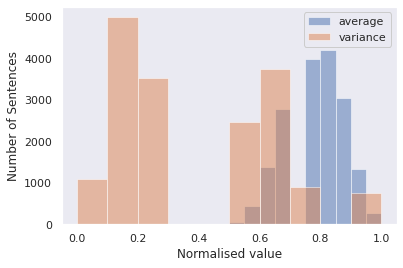

In [22]:
plt.figure()
df_agreement_avg['avg_agreement'].plot(kind='hist', alpha=0.5, label='average')
df_agreement_var['var_agreement'].plot(kind='hist', alpha=0.5, label='variance')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_overlay_agreement.png', transparent=True, bbox_inches='tight')

#### Plot Text Length

In [26]:
df_textlength_var['num_words']

0        0.024948
1        0.016632
2        0.010395
3        0.029106
4        0.014553
           ...   
17468    0.022869
17469    0.014553
17470    0.043659
17471    0.076923
17472    0.020790
Name: num_words, Length: 17473, dtype: float64

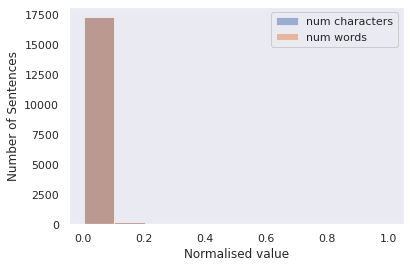

In [27]:
plt.figure()
df_textlength_avg['num_chars'].plot(kind='hist', alpha=0.5, label='num characters')
df_textlength_var['num_words'].plot(kind='hist', alpha=0.5, label='num words')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_overlay_textlength.png', transparent=True, bbox_inches='tight')

#### Plot Special

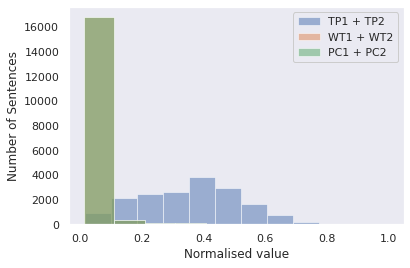

In [24]:
plt.figure()
df_special_1['average_avg_var'].plot(kind='hist', alpha=0.5, label='TP1 + TP2')
df_special_var['average_avg_var'].plot(kind='hist', alpha=0.5, label='WT1 + WT2')
df_special_4['average_avg_var'].plot(kind='hist', alpha=0.5, label='PC1 + PC2')
plt.grid(b=None)
legend = plt.legend(loc='upper right')
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 0, 0))
plt.xlabel('Normalised value')
plt.ylabel('Number of Sentences')
plt.savefig('./output/pop_overlay_special.png', transparent=True, bbox_inches='tight')

In [90]:
def plot_hist(df_array, label):
    weights = np.ones_like(df_array)/float(len(df_array))
    plt.hist(df_array, weights=weights, bins=82, label=label, histtype='step')

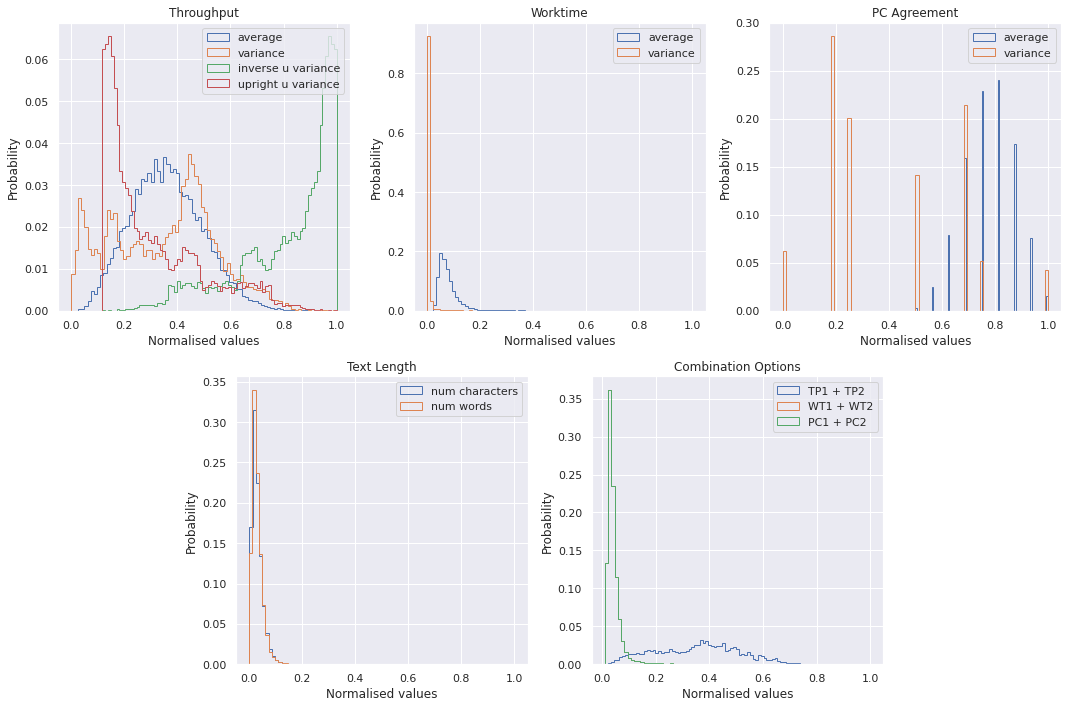

In [89]:
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
plot_hist(df_throughput_avg['avg_throughput'],'average')
plot_hist(df_throughput_var['var_throughput'],'variance')
plot_hist(df_throughput_inv_u['var_throughput_u_shaped'],'inverse u variance')
plot_hist(df_throughput_upright_u['var_throughput_u_shaped'],'upright u variance')

plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Throughput")

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
plot_hist(df_worktime_avg['avg_worktime'],'average')
plot_hist(df_worktime_var['var_worktime'],'variance')

plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Worktime")

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
plot_hist(df_agreement_avg['avg_agreement'],'average')
plot_hist(df_agreement_var['var_agreement'],'variance')

plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("PC Agreement")

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
plot_hist(df_textlength_avg['num_chars'],'num characters')
plot_hist(df_textlength_var['num_words'],'num words')

plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Text Length")

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
plot_hist(df_special_1['average_avg_var'],'TP1 + TP2')
plot_hist(df_special_var['average_avg_var'],'WT1 + WT2')
plot_hist(df_special_4['average_avg_var'],'PC1 + PC2')

plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Normalised values')
plt.title("Combination Options")

plt.tight_layout()
plt.savefig('./output/pop_overlay_all_new.png', transparent=True, bbox_inches='tight')